In [1]:
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

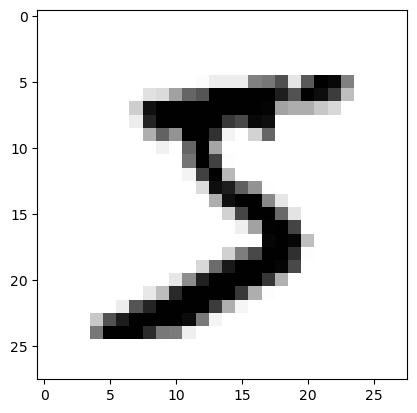

In [7]:
plt.imshow(single_image,cmap='gray_r')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
from keras.utils import to_categorical

In [11]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [12]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [13]:
single_image.max()

255

In [14]:
x_train = x_train / x_train.max() # /255

In [15]:
x_test = x_test / x_test.max() # /255

In [16]:
scale_image = x_train[0]
scale_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

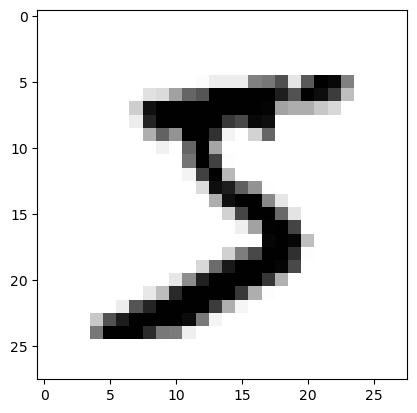

In [17]:
plt.imshow(scale_image,cmap='gray_r')

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [20]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

In [22]:
from keras.models import Sequential

In [23]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
# x_test[0].ravel().shape

In [25]:
model = Sequential()

# Convolutional Layer # This layer extracts features from the input image using convolutional filters.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))

# Pooling Layer # Reduces the spatial dimensions (height and width) of the feature map, which helps reduce computational complexity and control overfitting.
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatter Layer( 2d --> 1d)
model.add(Flatten())

# Dense Layer # 128 neurons and ReLU activation. # A fully connected layer that learns non-linear combinations of the features extracted by the convolutional and pooling layers.
model.add(Dense(128, activation='relu'))

#Output layer #The output layer with 10 neurons (one for each class) and softmax activation, making it suitable for multi-class classification.
model.add(Dense(10, activation='softmax'))

# Configures the model for training.
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

C:\Users\okeiy\.conda\envs\cvcourse_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9150 - loss: 0.2756
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0506


In [28]:
model.metrics_names

['loss', 'compile_metrics']

In [29]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0502


[0.039839521050453186, 0.9861999750137329]

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions = model.predict(x_test)  # Get probabilities
predicted_classes = np.argmax(predictions, axis=-1)  # Convert to class labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [32]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
predictions

array([[1.3385759e-09, 7.9084019e-09, 1.7167939e-06, ..., 9.9999630e-01,
        9.2670271e-09, 3.3136931e-07],
       [1.8800289e-07, 1.8503417e-05, 9.9998116e-01, ..., 2.6807848e-10,
        3.0512258e-08, 2.8596609e-12],
       [2.0925443e-06, 9.9969244e-01, 9.2115424e-06, ..., 1.0765734e-04,
        2.2501650e-05, 6.3933896e-07],
       ...,
       [3.0097810e-11, 5.3498880e-08, 1.8628307e-10, ..., 3.6614194e-06,
        6.7414004e-07, 1.7648505e-06],
       [6.3634986e-09, 3.5020598e-09, 3.6223805e-11, ..., 1.7503780e-09,
        2.6307202e-05, 3.7480092e-08],
       [6.0287255e-07, 1.4009174e-08, 3.7837367e-06, ..., 7.2448401e-11,
        6.6703535e-07, 7.4167530e-09]], dtype=float32)

In [35]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

